<a href="https://colab.research.google.com/github/wahyupratama18/PCVK_Genap_2022/blob/main/Finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

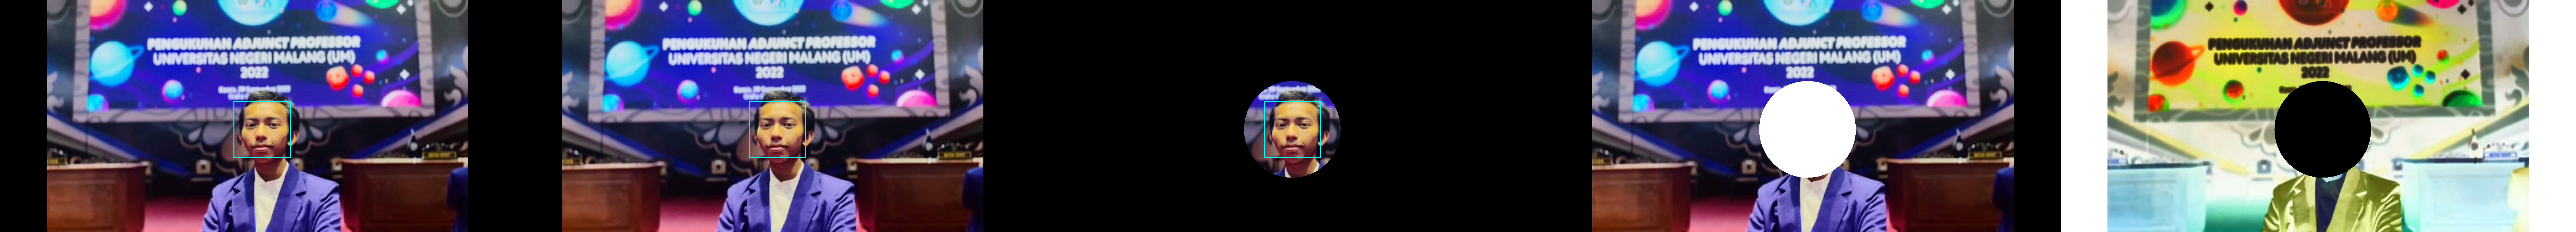

In [29]:
face_cascade = cv2.CascadeClassifier(
    f'{cv2.data.haarcascades}haarcascade_frontalface_default.xml')

img = cv2.imread('/content/drive/MyDrive/Classroom/PCVK/myself.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.08, 8)

mask = np.zeros(img.shape, dtype=np.uint8)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2)
    mask = cv2.circle(mask, (x+int(w/2), y+int(h/2)), 150, (255,255,255), -1)
  
funcAnd = img & mask
funcOr = img | mask
funcNot = ~img & ~mask
  
teeth_frame = cv2.hconcat((img, funcAnd, funcOr, funcNot))
cv2_imshow(teeth_frame)